In [2]:
#========Import required libraries==================
import cv2 as cv
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#==========this libraries for the models =============
from tensorflow import keras
from keras.utils.np_utils import normalize, to_categorical
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.layers import BatchNormalization


#============== Splitting the data into training and validation =========
from sklearn.model_selection import train_test_split

 
#========== This libraries for getting the result of accurcy and confusion matrix of the model =======
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score, jaccard_score

#======================= Avoiding warnings messages===============
import warnings
warnings.filterwarnings('ignore')

#============= This library used for saved the model =================
import pickle


In [3]:
#====================== To access to files in drive=========
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
 # ===============================path of the data=========================
path="/content/drive/MyDrive/Dataset"
#=========================read the csv file that contian the images name and its label
train=pd.read_csv(path+ '/label.csv')
#store the images name in (image_name )
image_name=train['file_name'].to_list()

#store the labels of the images in (label_name ), which tell us the type of tumors 
 
label_name=train['label'].to_list()


train_labels = [] 


#len(label_name)--> number of the data set that we have 
#this for loop will check on all the labal name list 
#and it will seprate the data into four class 0,1,2and 3


for i in range(len(label_name)):
    if label_name[i] == 'no_tumor':
        train_labels.append(0)
    elif label_name[i] == 'meningioma_tumor':
        train_labels.append(1)
    elif label_name[i] == 'glioma_tumor':
        train_labels.append(2)
    elif label_name[i] == 'pituitary_tumor':
        train_labels.append(3)

    


# print an example 
print("this image is", image_name[0] , label_name[0], "in Class: ", train_labels[0])
print("this image is", image_name[1] , label_name[1], "in Class: ", train_labels[1])
print("this image is", image_name[3] , label_name[3], "in Class: ", train_labels[3])
print("this image is", image_name[9] , label_name[9], "in Class: ", train_labels[9])


this image is IMAGE_0000.jpg meningioma_tumor in Class:  1
this image is IMAGE_0001.jpg no_tumor in Class:  0
this image is IMAGE_0003.jpg glioma_tumor in Class:  2
this image is IMAGE_0009.jpg pituitary_tumor in Class:  3


this image is IMAGE_0002.jpg meningioma_tumor in Class:  1


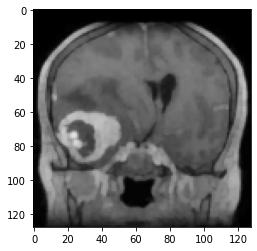

In [5]:
train_img = []  #X train 
img_size= 128    # use for resize the images 

# =========== Reading the preproccing images and resize it then convert it to an array ======
# =========== change the file path as its apear in your computer ================
for i in range(len(image_name)):
    train_img.append(np.array(cv.resize(cv.imread(path+"/New_images/"+image_name[i]),(img_size,img_size))))


train_img = np.array(train_img)

#Example of one image after resizing 
print("this image is", image_name[2] , label_name[2], "in Class: ", train_labels[2])
plt.imshow(train_img[2])



In [21]:
# ================== split the data  ===============
x_train, x_test, y_train, y_test = train_test_split(train_img, train_labels, test_size=0.2, random_state=42)

In [22]:
#========================== check the shape of the data ======================
print("X Train: ", x_train.shape)
#print("Y Train: ", y_train.shape)
print("X Test: ", x_test.shape)
#print("Y Test: ", y_test.shape)

X Train:  (2400, 128, 128, 3)
X Test:  (600, 128, 128, 3)


In [23]:
#============================ Normlize the data ================
x_train=normalize(x_train, axis=1)

x_test=normalize(x_test, axis=1)
#============================ Categorical the labels ===========
y_train=to_categorical(y_train, num_classes=4)
y_test=to_categorical(y_test, num_classes=4)


In [24]:
#=========================== Model Building========================= 
model= Sequential()

model.add(Conv2D(64, (5,5), input_shape=(img_size, img_size,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(265, (3,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.2))

          
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))


In [25]:
#=================================== Compiling the model =================
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
#=================================== Print the model Summary =============
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 activation_21 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 activation_22 (Activation)  (None, 64, 64, 128)       0         
                                                      

In [26]:
#=========================== Data Augmentation ====================
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)
#====================== Fitting the data Augmntation =================
datagen.fit(x_train)

#============================= Fitting the model with flow the data Augmented 
history1 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=32),epochs = 100, validation_data=(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100
75/75 [==============================] - 9s 105ms/step - loss: 1.3672 - accuracy: 0.2775 - val_loss: 1.3593 - val_accuracy: 0.2850
Epoch 2/100
75/75 [==============================] - 8s 100ms/step - loss: 1.3258 - accuracy: 0.3671 - val_loss: 1.1674 - val_accuracy: 0.5283
Epoch 3/100
75/75 [==============================] - 8s 100ms/step - loss: 1.1675 - accuracy: 0.4933 - val_loss: 1.0144 - val_accuracy: 0.5583
Epoch 4/100
75/75 [==============================] - 8s 101ms/step - loss: 1.0219 - accuracy: 0.5458 - val_loss: 0.8451 - val_accuracy: 0.6800
Epoch 5/100
75/75 [==============================] - 8s 102ms/step - loss: 0.9132 - accuracy: 0.6108 - val_loss: 0.7995 - val_accuracy: 0.6933
Epoch 6/100
75/75 [==============================] - 8s 101ms/step - loss: 0.8335 - accuracy: 0.6429 - val_loss: 0.7570 - val_accuracy: 0.7217
Epoch 7/100
75/75 [==============================] - 7s 98ms/step - loss: 0.7855 - accuracy: 0.6717 - val_loss: 0.7910 - val_accuracy: 0.7017


In [27]:
A= model.evaluate(x_test,y_test)

19/19 [==============================] - 0s 8ms/step - loss: 0.1740 - accuracy: 0.9533


In [28]:
y_pred=model.predict(x_test) 
y_pred1=np.argmax(y_pred, axis=1)
y_test1=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
#printing the Classificarion Report: 
print(classification_report(y_test1,y_pred1))

precision = precision_score(y_test1,y_pred1, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test1,y_pred1, average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test1,y_pred1, average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU

print ('IoU:', jaccard_score(y_test1,y_pred1, average='micro'))

print("Accuracy_test:",accuracy_score(y_test1,y_pred1))
#====
y_T= model.predict(x_train)
y_PT1=np.argmax(y_T, axis=1)
y_TN=np.argmax(y_train, axis=1)
print("Accuracy_train:",accuracy_score(y_PT1, y_TN))
#=====

[[ 84   3   2   3]
 [  1 165   5   0]
 [  4   6 151   2]
 [  1   1   0 172]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        92
           1       0.94      0.96      0.95       171
           2       0.96      0.93      0.94       163
           3       0.97      0.99      0.98       174

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

Precision: 0.953264
Recall: 0.953333
F1 score: 0.953163
IoU: 0.910828025477707
Accuracy_test: 0.9533333333333334
Accuracy_train: 0.99375


In [29]:
# Now, this code will print the confusion matrix of our results
# with normlization, and without normilazation 
class_names = ['No Tumor', 'Meningioma Tumor', 'Glioma Tumor','Pituitary Tumor']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion Matrix, without Normalization


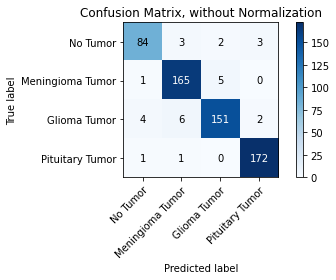

Normalized Confusion Matrix


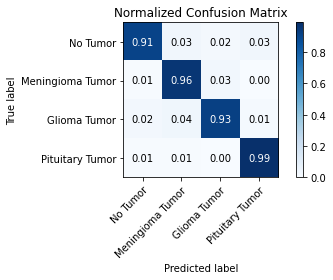

In [31]:
#======Print the matrix============

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14}

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test1, y_pred1, classes=class_names,
                      title='Confusion Matrix, without Normalization')
plt.savefig('confusion matrix22'+'Brain Tumor1'+'.png')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test1, y_pred1, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.savefig('Confusion Matrix'+'RF' +'.png')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


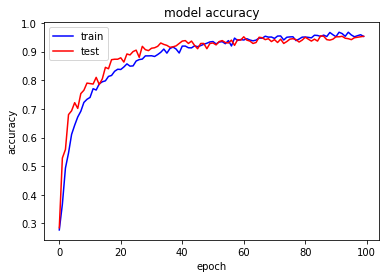

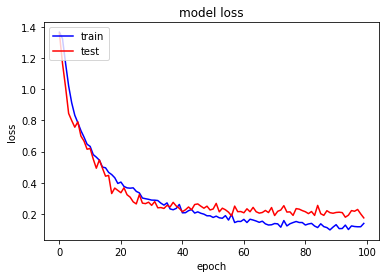

In [32]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'],color='blue')
plt.plot(history1.history['val_accuracy'],color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history1.history['loss'],color='blue')
plt.plot(history1.history['val_loss'],color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
filename = 'CNN_model_Task2.sav'
pickle.dump( model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://5b1ae98a-730f-43da-ba0e-68f98354850c/assets
